In [2]:
# Loading packages:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *

from phd_functions import *

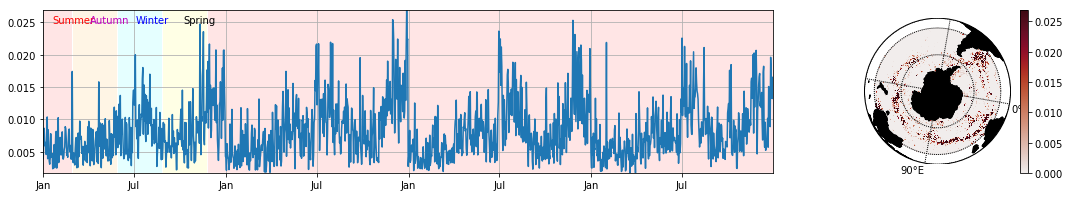

In [ ]:
eke_eddy=seasonal_variation_EKEE(306,322,areamap='',plot=True,hemisphere='',days=365*4)

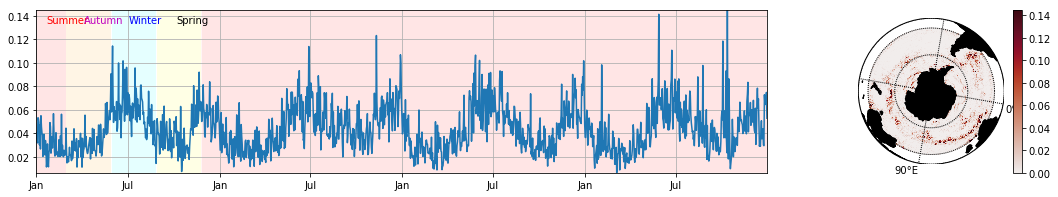

In [2]:
eke_eddy=seasonal_variation_EKE(306,322,areamap='',plot=True,hemisphere='',days=365*4)

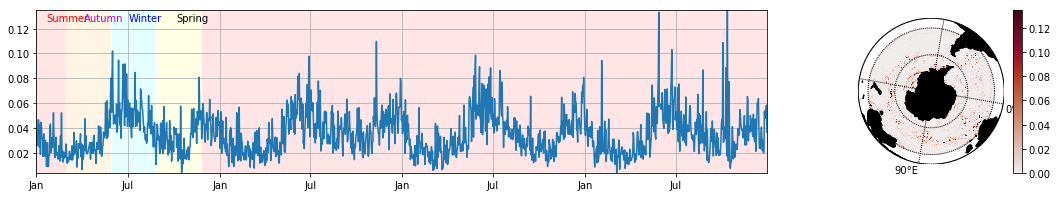

In [3]:
eke_eddy=seasonal_variation_EKEB(306,322,areamap='',plot=True,hemisphere='',days=365*4)

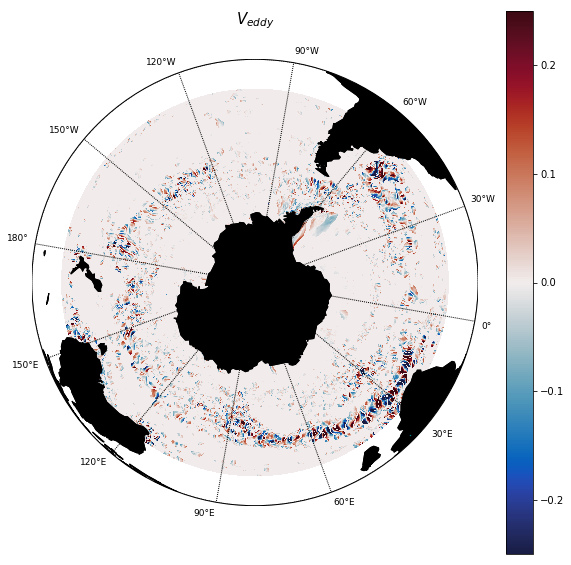

In [10]:
vel320=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/320_v_prime_eddy_1yrs.nc')
lon=vel320.variables['Longitude'][:]
lat=vel320.variables['Latitude'][:]
v=np.squeeze(vel320.variables['V'])
basemap_mplot(lon,lat,v[0,:,:],\
              title=r"$V_{eddy}$",scale='Lin',cmap=cm.cm.balance\
              ,vmin=-0.25,vmax=0.25,xan=1,yan=1,figsize=(10,10),fontsize=15)
colorbar()

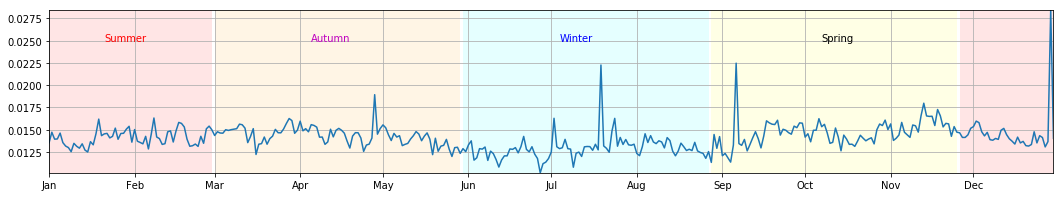

In [4]:
eke_eddy=sim_EKE_eddy_seasonal_variation(306,310,areamap='',plot=True,hemisphere='',basemap=False)

In [38]:
ekefile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_eddy_309.nc')
lon=ekefile.variables['Longitude'][:]
lat=ekefile.variables['Latitude'][:]
eke=np.squeeze(ekefile.variables['EKE_eddy'])
eke[eke==0]=np.nan

0.015734529

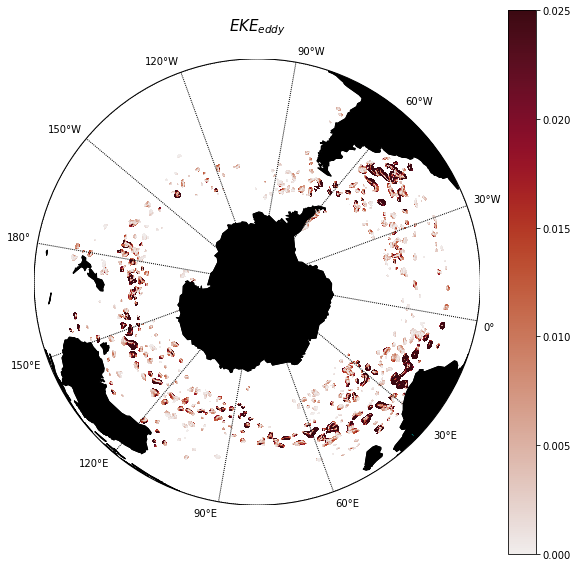

In [8]:
basemap_mplot(lon,lat,eke[0,:,:],\
              title=r"$EKE_{eddy}$",scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=0.025,xan=1,yan=1,figsize=(10,10),fontsize=15)
colorbar()
eke[eke==0]=np.nan
nanmean(eke[0,:,:])

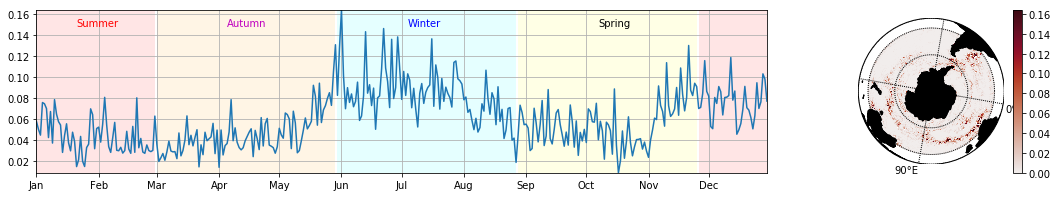

In [4]:
eke_back=sim_EKE_back_seasonal_variation(306,310,areamap='',plot=True,hemisphere='',basemap=True)

In [4]:
ekefile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_back_306.nc')
lon=ekefile.variables['Longitude'][:]
lat=ekefile.variables['Latitude'][:]
eke=np.squeeze(ekefile.variables['EKE_eddy'])

In [ ]:
eke_eddy_mean=zeros(365)
for ii in range(shape(eke)[0]):
    eke_eddy_mean[ii]=nanmean(eke[ii,:,:])
plot(eke_eddy)
plot(eke_eddy_mean)

0.057963941

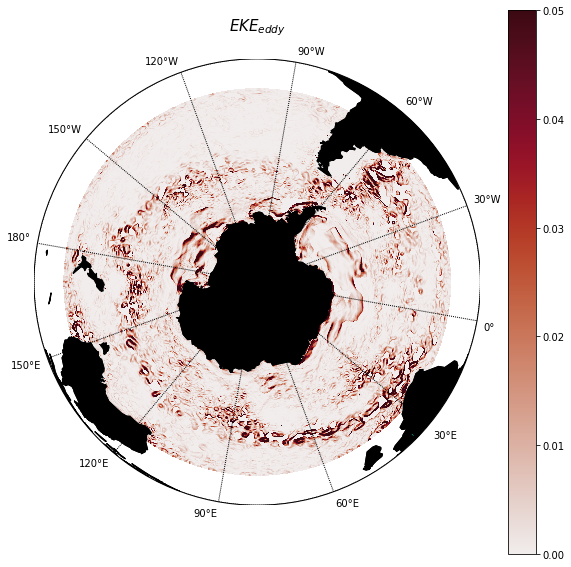

In [5]:
basemap_mplot(lon,lat,eke[0,:,:],\
              title=r"$EKE_{eddy}$",scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=0.05,xan=1,yan=1,figsize=(10,10),fontsize=15)
colorbar()
nanmean(eke[0,:,:])
eke[eke==0]=np.nan
nanmean(eke[0,:,:])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

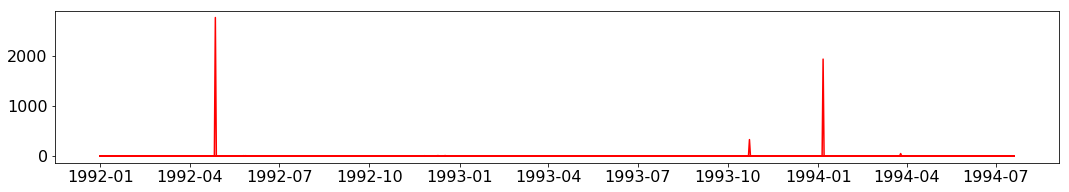

In [38]:
numdays=len(eke_eddy)
base = datetime.datetime(1992, 1, 1, 0, 0)
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]
fig, ax = plt.subplots(1,1,figsize=(18,2.8))
ln=ax.plot(date_list,eke_eddy,'-r',label='$EKE_{eddy}$')
ax.text(date_list[20], max(eke_eddy)-np.mean(eke_eddy)/4,'Summer',color='red',fontsize=16)
ax.fill_between(date_list[0:60], eke_eddy.min(), eke_eddy.max(), facecolor='red', alpha=0.1)
ax.text(date_list[95], max(eke_eddy)-np.mean(eke_eddy)/4,'Autumn',color='m',fontsize=16)
ax.fill_between(date_list[60:150], eke_eddy.min(), eke_eddy.max(), facecolor='orange', alpha=0.1)
ax.text(date_list[185], max(eke_eddy)-np.mean(eke_eddy)/4,'Winter',color='Blue',fontsize=16)
ax.fill_between(date_list[150:240], eke_eddy.min(), eke_eddy.max(), facecolor='cyan', alpha=0.1)
ax.text(date_list[280], max(eke_eddy)-np.mean(eke_eddy)/4,'Spring',color='Black',fontsize=16)
ax.fill_between(date_list[240:330], eke_eddy.min(), eke_eddy.max(), facecolor='yellow', alpha=0.1)
ax.fill_between(date_list[330:], eke_eddy.min(), eke_eddy.max(), facecolor='red', alpha=0.1)

ax.grid(True)
ax.set_xlim(date_list[0],date_list[-1])
ax.tick_params('y', colors='r')

ax2 = ax.twinx()
ln2=ax2.plot(date_list,eke_back,'-b',label='$EKE_{residual}$')
#ln2=ax2.plot(date_list,eke_smean,'-c',label='$EKE$')
ax2.tick_params('y', colors='b')


lns = ln+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, prop={'size': 12})

ax.set_ylim(eke_eddy.min(), eke_eddy.max())
monthsFmt = plt.DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

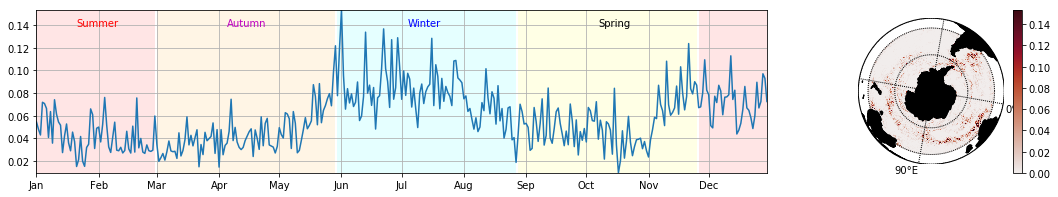

In [2]:
eke_smean=sim_EKE_seasonal_variation(306,310,areamap='',plot=True,hemisphere='',basemap=True)

In [8]:
ii=306
ufilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_u_1yrs.nc')
u=np.squeeze(ufilename.variables['U'][0,:,:])
lon=ufilename.variables['Longitude'][:]
lat=ufilename.variables['Latitude'][:]
ufile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/30'+str(ii)+'_u_prime_eddy_1yrs.nc')
u_prime=np.squeeze(ufile.variables['U'][0,:,:])
vfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_v_1yrs.nc')
v=np.squeeze(vfilename.variables['V'][0,:,:])
vfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/30'+str(ii)+'_v_prime_eddy_1yrs.nc')
v_prime=np.squeeze(vfile.variables['V'][0,:,:])

In [9]:
eke_eddy=KE(u_prime,v_prime)
eke=KE(u,v)
eke_back=eke-eke_eddy

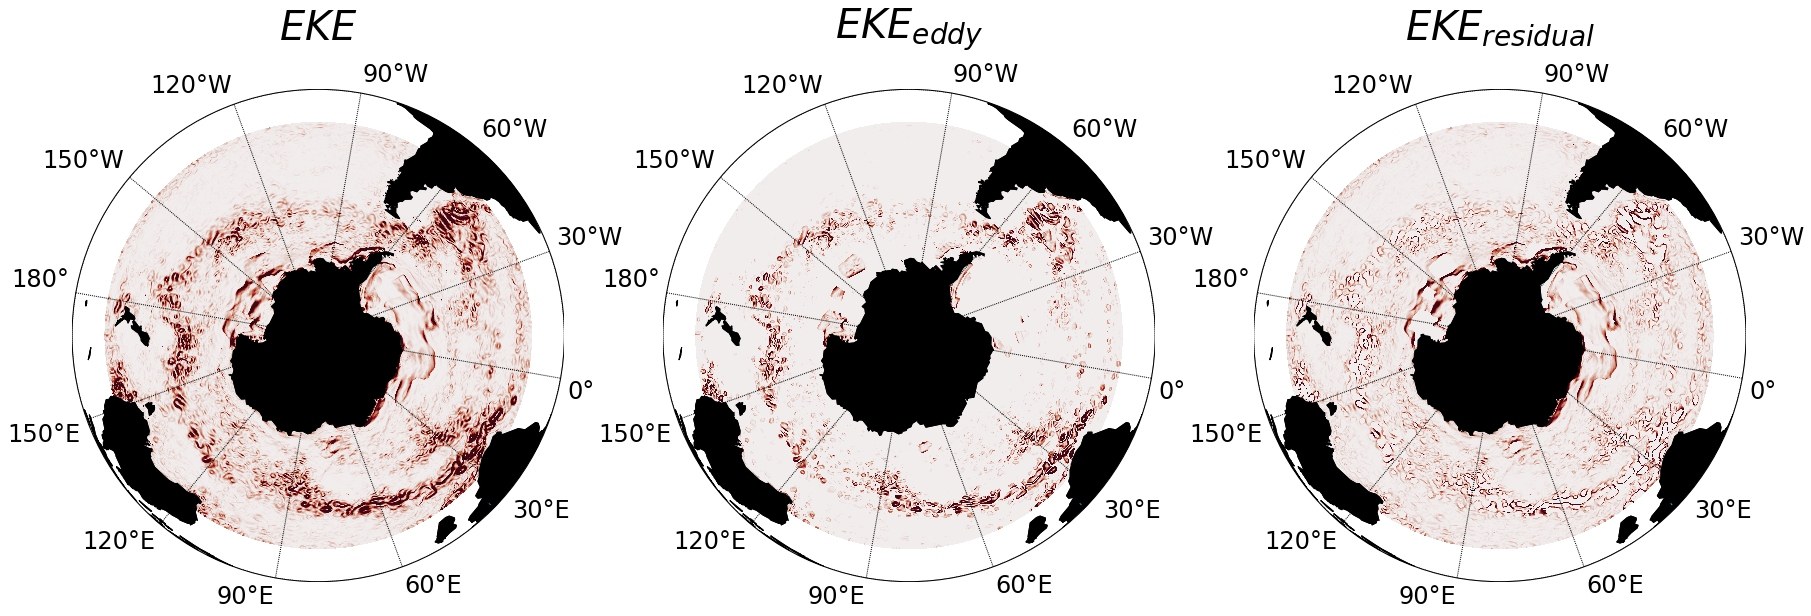

In [10]:
basemap_mplot(lon,lat,[eke,eke_eddy,eke_back],\
              title=[r"$EKE$",r"$EKE_{eddy}$",r"$EKE_{residual}$"],scale='Lin',cmap=cm.cm.amp\
              ,lon_0=-100,lat_0=-90,boundinglat=-30,vmin=0,vmax=0.05,xan=1,yan=3,figsize=(30,10),fontsize=40)
#colorbar()
plt.savefig('../output/eke.png', format='png', dpi=300,bbox_inches='tight')

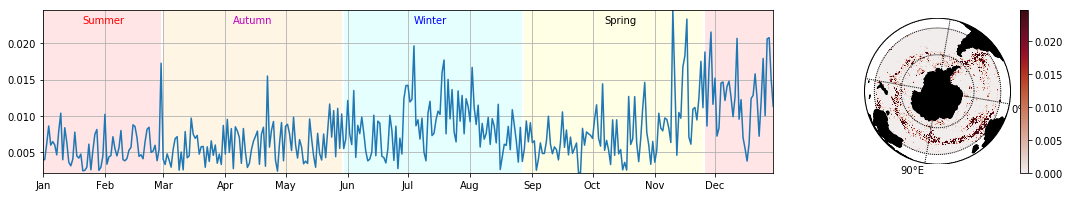

In [11]:
eke_eddy=sim_seasonal_variation_eke(306,310,areamap='',plot=True,hemisphere='')

In [12]:
counter=0
eke_eddy_mean=zeros([365])
eke_mean=zeros([365])
eke_back_mean=zeros([365])
for ii in range(306,310):

    
    ufilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_u_1yrs.nc')
    u=np.squeeze(ufilename.variables['U'][:,:,:])
    lon=ufilename.variables['Longitude'][:]
    lat=ufilename.variables['Latitude'][:]

    eke_eddy=zeros(shape(u))
    eke=zeros(shape(u))
    eke_back=zeros(shape(u))
    
    for tt in range(shape(u)[0]):
        ufile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/30'+str(ii)+'_u_prime_eddy_1yrs.nc')
        u_prime=np.squeeze(ufile.variables['U'][tt,:,:])
        vfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_v_1yrs.nc')
        v=np.squeeze(vfilename.variables['V'][tt,:,:])
        vfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/30'+str(ii)+'_v_prime_eddy_1yrs.nc')
        v_prime=np.squeeze(vfile.variables['V'][tt,:,:])
    
        eke_eddy[tt,:,:]=KE(u_prime,v_prime)
        eke[tt,:,:]=KE(u[tt,:,:],v)
        eke_back[tt,:,:]=eke[tt,:,:]-eke_eddy[tt,:,:]
        
        eke_eddy[eke_eddy==0]=np.nan
        eke_back[eke_back==0]=np.nan
        
        eke_eddy_mean[counter]=np.nanmean(eke_eddy[tt,:,:])
        eke_mean[counter]=np.nanmean(eke[tt,:,:])
        eke_back_mean[counter]=np.nanmean(eke_back[tt,:,:])
        
        counter=counter+1

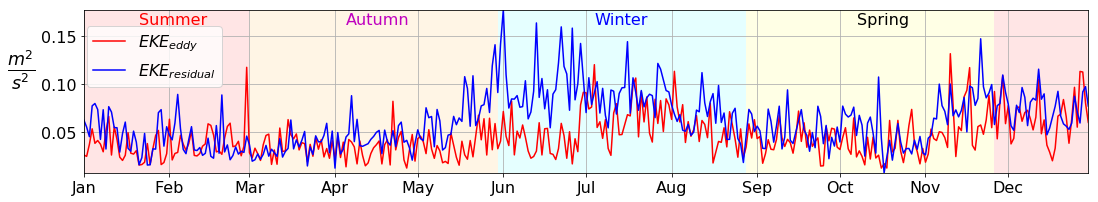

In [28]:
eke_eddy=eke_eddy_mean
eke_back=eke_back_mean

numdays=len(eke_eddy)
base = datetime.datetime(1992, 1, 1, 0, 0)
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]
fig, ax = plt.subplots(1,1,figsize=(18,3))
ln=ax.plot(date_list,eke_eddy,'-r',label='$EKE_{eddy}$')
ln2=ax.plot(date_list,eke_back,'-b',label='$EKE_{residual}$')
lns = ln+ln2
labs = [l.get_label() for l in lns]
#ax.legend(prop={'size': 16})
ax.legend(lns, labs, bbox_to_anchor=(0.145, 0.48), bbox_transform=ax.transAxes, prop={'size': 16})
ax.text(date_list[20], max(eke_back)-np.mean(eke_eddy)/3,'Summer',color='red',fontsize=16)
ax.fill_between(date_list[0:61], eke_back.min(), eke_back.max(), facecolor='red', alpha=0.1)
ax.text(date_list[95], max(eke_back)-np.mean(eke_eddy)/3,'Autumn',color='m',fontsize=16)
ax.fill_between(date_list[60:151], eke_back.min(), eke_back.max(), facecolor='orange', alpha=0.1)
ax.text(date_list[185], max(eke_back)-np.mean(eke_eddy)/3,'Winter',color='Blue',fontsize=16)
ax.fill_between(date_list[150:241], eke_back.min(), eke_back.max(), facecolor='cyan', alpha=0.1)
ax.text(date_list[280], max(eke_back)-np.mean(eke_eddy)/3,'Spring',color='Black',fontsize=16)
ax.fill_between(date_list[240:331], eke_back.min(), eke_back.max(), facecolor='yellow', alpha=0.1)
ax.fill_between(date_list[330:], eke_back.min(), eke_back.max(), facecolor='red', alpha=0.1)

ax.set_ylabel(r'$\frac{m^2}{s^2}$', color='k',fontsize=25,rotation=0)
ax.set_xlim(date_list[0],date_list[-1])
ax.tick_params('y', colors='k')
ax.yaxis.labelpad = 20
ax.grid()


#ln2=ax2.plot(date_list,eke_smean,'-c',label='$EKE$')
#ax2.tick_params('y', colors='b')
#ax2.yaxis.labelpad = 20
#ax2.set_ylabel(r'$\frac{m^2}{s^2}$', color='b',fontsize=25,rotation=0)


ax.set_ylim(eke_back.min(), eke_back.max())
monthsFmt = plt.DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('../output/season_eke.png', format='png', dpi=600, bbox_inches='tight')

In [15]:
outfile='/g/data/v45/jm5970/trackeddy_out/'
2428 2388
read_dictionary1 = np.load(outfile+'306_pos.npy')
dict1=read_dictionary1.item()
read_dictionary2 = np.load(outfile+'307_pos.npy')
dict2=read_dictionary2.item()

read_dictionary3 = np.load(outfile+'308_pos.npy')
dict3=read_dictionary3.item()
read_dictionary4 = np.load(outfile+'309_pos.npy')
dict4=read_dictionary4.item()

In [16]:
dictjoin=joindict(dict1,dict2)

dictjoin1=joindict(dict3,dict4)

In [17]:
yearjoin=joindict(dictjoin,dictjoin1)

In [18]:
def trackmatix(eddydict):
    eddy=0
    time=0
    for key,value in eddydict.items():
        if type(value['time'])!=int:
            if value['time'][-1]>time:
                time=value['time'][-1]+1

    positions=zeros([2,len(eddydict.items()),int(time)])
    for key,value in eddydict.items():
        if type(value['time'])==int:
            positions[0,eddy,value['time']]=value['position'][0]
            positions[1,eddy,value['time']]=value['position'][1]
        else:
            realinx=0
            for ii in value['time']:
                #print(ii)
                positions[0,eddy,ii]=squeeze(value['position'][realinx,0])
                positions[1,eddy,ii]=squeeze(value['position'][realinx,1])
                realinx=realinx+1
        eddy=eddy+1
    positions[positions==0]=np.nan
    return(positions)

In [19]:
positions=trackmatix(yearjoin)

In [20]:
eddies=[]
for i in range(shape(positions)[1]):
    count=0
    for j in range(shape(positions)[2]):
        if not np.isnan(positions[0,i,j]):
            count=count+1
    if count>=30:
        eddies.append(i)

In [21]:
print(len(eddies))

1547


In [22]:
outfile='/g/data/v45/jm5970/trackeddy_out/'

read_dictionary1 = np.load(outfile+'306_neg.npy')
dict1=read_dictionary1.item()
read_dictionary2 = np.load(outfile+'307_neg.npy')
dict2=read_dictionary2.item()

read_dictionary3 = np.load(outfile+'308_neg.npy')
dict3=read_dictionary3.item()
read_dictionary4 = np.load(outfile+'309_neg.npy')
dict4=read_dictionary4.item()

In [23]:
dictjoin=joindict(dict1,dict2)

dictjoin1=joindict(dict3,dict4)

In [24]:
yearjoin=joindict(dictjoin,dictjoin1)

In [25]:
positionsneg=trackmatix(yearjoin)

In [26]:
eddiesneg=[]
for i in range(shape(positionsneg)[1]):
    count=0
    for j in range(shape(positionsneg)[2]):
        if not np.isnan(positions[0,i,j]):
            count=count+1
    if count>=30:
        eddiesneg.append(i)

In [27]:
print(len(eddiesneg))

1203


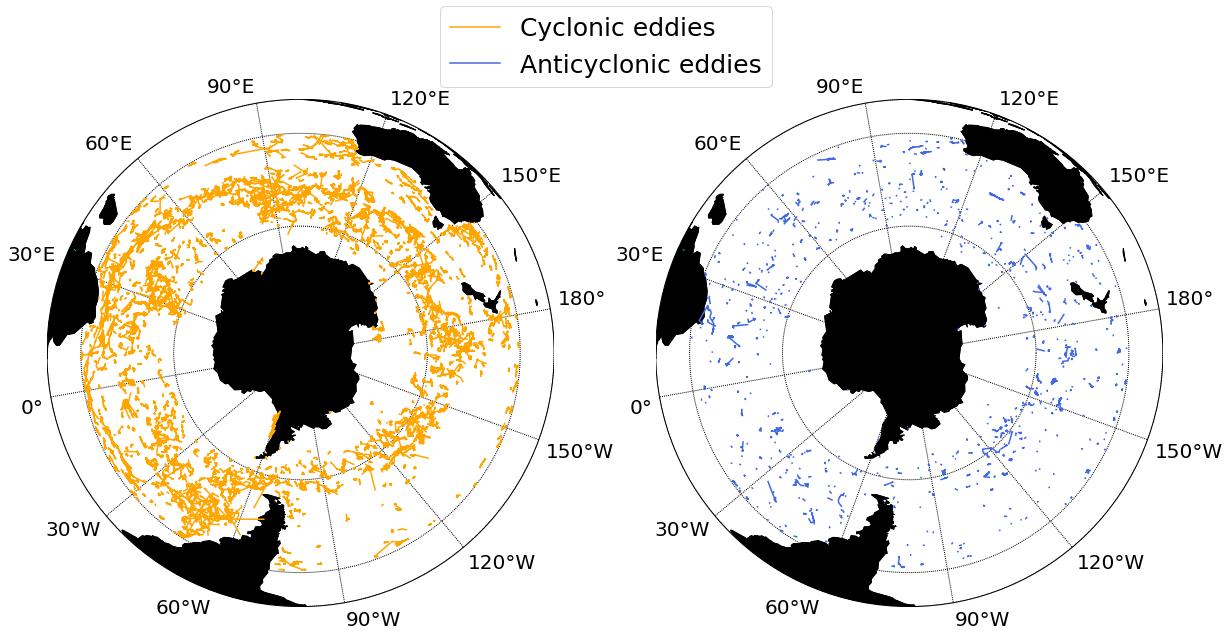

In [29]:
fig = plt.figure(figsize=(20, 10),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=-90,lon_0=100,boundinglat=-30\
              ,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=20)
map.drawparallels(np.arange(-180,180,30),fontsize=20)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()

for i in eddies:
    posx,posy=map(positions[0,i,:],positions[1,i,:])
    posx[posx==1.00000000e+30]=np.nan
    posy[posy==1.00000000e+30]=np.nan
    ln1=map.plot(posx,posy,'-',color='orange',label='Cyclonic eddies')

ax2 = plt.subplot(gs[0,1])
#map1 = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c')

map = Basemap(projection='ortho',lat_0=-90,lon_0=100,boundinglat=-30\
              ,resolution='c',ax=ax2)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=20)
map.drawparallels(np.arange(-180,180,30),fontsize=20)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
    
for i in eddiesneg:
    posx,posy=map(positionsneg[0,i,:],positionsneg[1,i,:])
    posx[posx==1.00000000e+30]=np.nan
    posy[posy==1.00000000e+30]=np.nan
    ln2=map.plot(posx,posy,'-',color='royalblue',label='Anticyclonic eddies')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, bbox_to_anchor=(0.75, 1), bbox_transform=ax1.transAxes, prop={'size': 25})
plt.savefig('../output/eddy_track.png', format='png', dpi=300, bbox_inches='tight')

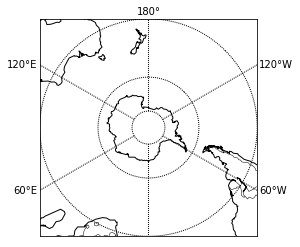

In [22]:
from mpl_toolkits.basemap import Basemap 
import numpy as np 
import matplotlib.pyplot as plt 

fig = plt.figure() 
# global ortho map centered on lon_0,lat_0 
lat_0=-90.; lon_0=0. 
# resolution = None means don't process the boundary datasets. 
m = Basemap(projection='spstere',lon_0=lon_0,lat_0=lat_0,boundinglat=-30,resolution='c') 
m.drawcoastlines() 
m.drawcountries() 
# draw parallels and meridians. 
m.drawparallels(np.arange(-90.,120.,30.)) 
m.drawmeridians(np.arange(0.,360.,60.),labels=[1,1,1,0]) 
plt.show() 

In [40]:
lat.max()

-29.980156